<a href="https://colab.research.google.com/github/HannanSheikh/RandomForestTree_Algorithm/blob/master/DecisionTreeALgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame([[5,'Low','Normal','A'],[7,'Normal','Normal','A'],[10,'Normal','Low','B'],[12,'Normal','High','B']
                   ,[13,'High','Normal','B'],[18,'Normal','Normal','A'],[22,'Normal','Normal','A'],[24,'Normal','Normal','A']
                   ,[27,'Normal','Normal','A'],[34,'Normal','Normal','A'],[32,'Normal','Normal','A'],[36,'Normal','Normal','A']
                   ,[40,'Normal','High','B'],[51,'High','Normal','B'],[59,'Normal','Normal','A'],[67,'High','Normal','B'],
                    [56,'Normal','Normal','A'],],columns=["Age","Sugar","BP","Medicine"])

In [ ]:
df.head()

,Age,Sugar,BP,Medicine
0,5,Low,Normal,A
1,7,Normal,Normal,A
2,10,Normal,Low,B
3,12,Normal,High,B
4,13,High,Normal,B


In [ ]:
y=df['Medicine'] # targeted column ko alag varialble m krlia
y

0     A
1     A
2     B
3     B
4     B
5     A
6     A
7     A
8     A
9     A
10    A
11    A
12    B
13    B
14    A
15    B
16    A
Name: Medicine, dtype: object

In [ ]:
#Independent column k text ko number m covert krege q k algo text nh smjhta
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_Sugar = LabelEncoder()

In [ ]:
# ek alag dataframe bnaege all numeric values k liye
X = pd.DataFrame(columns=['nBP','nSugar','Age'])

In [ ]:
X

,nBP,nSugar,Age


In [ ]:
# jo numeric label set kre h usy new dataframe m assign kr rhe h
X['nBP']=le_BP.fit_transform(df['BP'])
X['nSugar']=le_Sugar.fit_transform(df['Sugar'])
X['Age']=df['Age']

In [ ]:
X

,nBP,nSugar,Age
0,2,1,5
1,2,2,7
2,1,2,10
3,0,2,12
4,2,0,13
5,2,2,18
6,2,2,22
7,2,2,24
8,2,2,27
9,2,2,34


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
xtest

,nBP,nSugar,Age
14,2,2,59
7,2,2,24
10,2,2,32
2,1,2,10
12,0,2,40
13,2,0,51
3,0,2,12


In [ ]:
ytest

14    A
7     A
10    A
2     B
12    B
13    B
3     B
Name: Medicine, dtype: object

In [ ]:
classifier.predict(xtest)

array(['A', 'A', 'A', 'A', 'A', 'B', 'A'], dtype=object)

In [ ]:
classifier.score(xtest,ytest)

0.5714285714285714

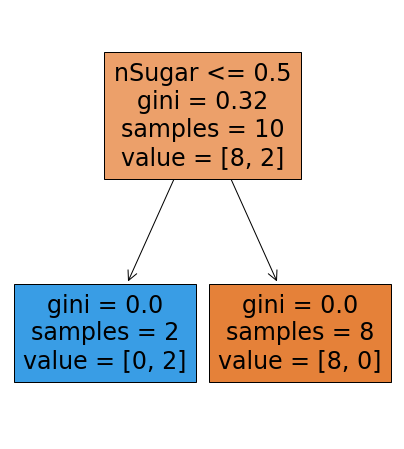

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(7,8))
plot_tree(classifier,filled=True,feature_names=X.columns)
plt.show()

# **Random** **Forest**  **Tree**



In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rclassifier = RandomForestClassifier()

In [ ]:
Rclassifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
xtest

,nBP,nSugar,Age
16,2,2,56
2,1,2,10
8,2,2,27
9,2,2,34


In [ ]:
ytest

16    A
2     B
8     A
9     A
Name: Medicine, dtype: object

In [ ]:
Rclassifier.predict(xtest)

array(['A', 'B', 'A', 'A'], dtype=object)

In [ ]:
Rclassifier.score(xtest,ytest)

1.0

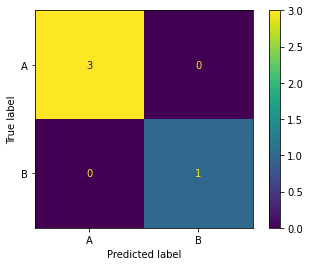

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Rclassifier,xtest,ytest)